In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import glob
import os
from shutil import copyfile
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('*/score.sc')], ignore_index = True)

-133.5734799714606 15.374784909478349


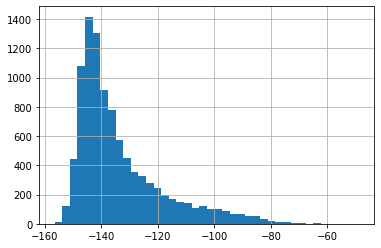

In [6]:
df['hbond_lr_bb'].hist(bins=40)
print(df['hbond_lr_bb'].mean(), df['hbond_lr_bb'].std())

80.30312210783813 149.36113386234803


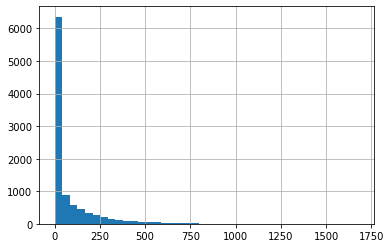

In [7]:
df['vdw'].hist(bins=40)
print(df['vdw'].mean(), df['vdw'].std())

37.71573020079503 27.532137532086256


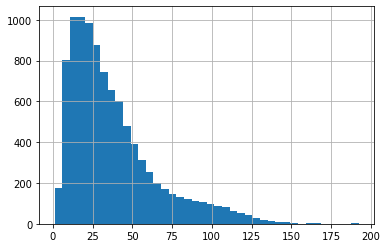

In [8]:
df['omega'].hist(bins=40)
print(df['omega'].mean(), df['omega'].std())

8.942090816430536 9.096850362820959


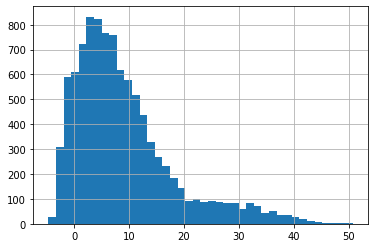

In [9]:
df['cen_rama'].hist(bins=40)
print(df['cen_rama'].mean(), df['cen_rama'].std())

In [44]:
dclash = df.loc[(df['vdw'] < 1.0) & (df['omega'] < 15.0) & (df['cen_rama'] < 0.12)]
dclash

,SCORE:,total_score,cen_rama,cen_total,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,...,p_aa_pp,pro_close,rama_prepro,ref,rg,rsigma,sspair,vdw,yhh_planarity,description
20,SCORE:,25415.966,-0.677,-766.435,0.0,-1043.341,4368.171,-267.233,16.831,11.341,...,-34.981,0.0,64.102,458.812,17.221,-251.821,-391.738,0.341,0.0,input_0021
30,SCORE:,21790.728,-0.569,-739.490,0.0,-1026.665,4478.411,-262.883,16.049,11.279,...,-31.227,0.0,64.650,458.812,17.131,-247.448,-386.287,0.544,0.0,input_0031
38,SCORE:,23311.028,-2.154,-725.817,0.0,-1031.374,4325.099,-265.155,16.547,11.313,...,-34.244,0.0,61.642,458.812,17.201,-246.609,-381.297,0.484,0.0,input_0039
45,SCORE:,22066.773,-1.538,-747.069,0.0,-1027.893,4571.364,-259.862,15.190,11.215,...,-22.301,0.0,66.768,458.812,17.233,-248.219,-388.728,0.798,0.0,input_0046
53,SCORE:,21051.561,-1.517,-754.658,0.0,-1012.876,4390.166,-270.374,15.448,11.282,...,-30.982,0.0,62.603,458.812,17.413,-249.922,-386.651,0.022,0.0,input_0054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9648,SCORE:,23932.603,-0.526,-707.584,0.0,-1042.580,4591.701,-254.836,16.461,11.239,...,-25.882,0.0,67.898,458.812,17.018,-234.221,-377.607,0.889,0.0,input_0008
9714,SCORE:,21863.229,-1.787,-743.163,0.0,-1025.430,4529.972,-266.318,14.776,11.277,...,-28.090,0.0,60.940,458.812,17.195,-242.060,-387.218,0.471,0.0,input_0074
9720,SCORE:,20608.796,-1.901,-743.817,0.0,-1014.195,4461.622,-260.975,15.073,11.208,...,-27.918,0.0,61.094,458.812,17.159,-251.596,-385.890,0.851,0.0,input_0080
9729,SCORE:,21484.147,-0.591,-763.303,0.0,-1007.405,4483.355,-268.010,15.930,11.267,...,-33.682,0.0,70.418,458.812,17.337,-256.291,-392.122,0.890,0.0,input_0089


In [47]:
for folder_id in range(0,50):
    score_file = str(folder_id) + "/score.sc"
    dsc = pd.read_csv(score_file, sep='\s+', header=1)
    dclashes = dsc.loc[(dsc['vdw'] < 1.0) & (dsc['omega'] < 15.0) & (dsc['cen_rama'] < 0.12)]
    print(dclashes.shape)
    for model in dclashes.description:
        source = str(folder_id) + "/" + model + ".pdb"
        target = "best500_AAG/" + str(folder_id) + "_" + model + ".pdb"
        copyfile(source, target)

(10, 28)
(8, 28)
(15, 28)
(10, 28)
(12, 28)
(8, 28)
(7, 28)
(6, 28)
(8, 28)
(5, 28)
(10, 28)
(15, 28)
(14, 28)
(8, 28)
(10, 28)
(13, 28)
(9, 28)
(8, 28)
(13, 28)
(15, 28)
(11, 28)
(7, 28)
(9, 28)
(13, 28)
(9, 28)
(8, 28)
(12, 28)
(10, 28)
(10, 28)
(9, 28)
(11, 28)
(7, 28)
(9, 28)
(12, 28)
(13, 28)
(4, 28)
(11, 28)
(10, 28)
(5, 28)
(11, 28)
(6, 28)
(10, 28)
(8, 28)
(14, 28)
(15, 28)
(10, 28)
(11, 28)
(10, 28)
(14, 28)
(10, 28)


In [3]:
for folder_id in range(0,50):
    score_file = str(folder_id) + "/" + str(folder_id) + "__score.sc"
    dsc = pd.read_csv(score_file, sep='\s+', header=1)

    dclashes = dsc.loc[(dsc['vdw'] < 1.0) & (dsc['omega'] < 23.0) & (dsc['cen_rama'] < 5.0)]
    print dclashes.shape
    for model in dclashes.description:
        source = str(folder_id) + "/" + model + ".pdb"
        target = "best_200_AAAGG/" + model + ".pdb"
        copyfile(source, target)

(5, 26)
(2, 26)
(3, 26)
(2, 26)
(1, 26)
(6, 26)
(2, 26)
(1, 26)
(4, 26)
(8, 26)
(2, 26)
(3, 26)
(3, 26)
(1, 26)
(4, 26)
(2, 26)
(0, 26)
(4, 26)
(4, 26)
(5, 26)
(4, 26)
(4, 26)
(3, 26)
(0, 26)
(4, 26)
(5, 26)
(2, 26)
(4, 26)
(0, 26)
(2, 26)
(3, 26)
(3, 26)
(1, 26)
(2, 26)
(4, 26)
(4, 26)
(3, 26)
(2, 26)
(5, 26)
(2, 26)
(2, 26)
(3, 26)
(4, 26)
(4, 26)
(6, 26)
(2, 26)
(9, 26)
(4, 26)
(1, 26)
(1, 26)


   SCORE:  total_score  dslf_fa13   fa_atr   fa_dun  fa_elec  fa_intra_rep  \
0  SCORE:     -380.798        0.0 -585.013  101.465 -263.140         1.283   
1  SCORE:     -379.774        0.0 -569.362   91.771 -249.970         1.226   
2  SCORE:     -392.983        0.0 -563.710   97.905 -269.422         1.201   
3  SCORE:     -380.448        0.0 -569.010   94.542 -255.156         1.316   
4  SCORE:     -385.940        0.0 -573.773  103.881 -272.315         1.302   

   fa_intra_sol_xover4  fa_rep   fa_sol         ...          hbond_sc  \
0               16.435  83.371  363.222         ...           -20.381   
1               15.416  78.154  343.428         ...           -17.427   
2               17.290  74.809  360.240         ...           -22.558   
3               16.888  79.570  353.574         ...           -28.138   
4               18.514  78.594  373.331         ...           -20.977   

   hbond_sr_bb  lk_ball_wtd   omega  p_aa_pp  pro_close  rama_prepro     ref  \
0      -24.1

In [5]:
df = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('best500_AAG/*_input_*/score.sc')], ignore_index = True)
print(df)

      SCORE:  total_score  dslf_fa13   fa_atr   fa_dun  fa_elec  fa_intra_rep  \
0     SCORE:     -623.730        0.0 -884.397  165.176 -411.579         2.021   
1     SCORE:     -607.142        0.0 -887.304  159.107 -375.973         2.004   
2     SCORE:     -606.387        0.0 -879.620  165.622 -395.349         2.077   
3     SCORE:     -597.030        0.0 -880.123  155.569 -386.983         2.061   
4     SCORE:     -599.699        0.0 -869.500  170.269 -396.568         2.060   
...      ...          ...        ...      ...      ...      ...           ...   
2510  SCORE:     -594.702        0.0 -893.608  167.597 -396.013         2.092   
2511  SCORE:     -606.153        0.0 -887.578  158.412 -383.489         2.093   
2512  SCORE:     -608.338        0.0 -888.734  159.532 -386.607         2.128   
2513  SCORE:     -604.783        0.0 -887.988  164.608 -387.732         2.062   
2514  SCORE:     -612.724        0.0 -891.848  163.538 -393.778         2.094   

      fa_intra_sol_xover4  

16.48447435387674 2.3718896409849815


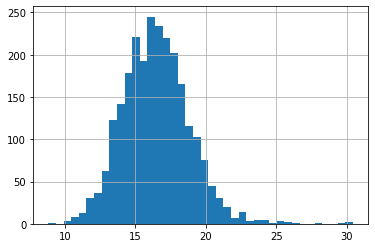

In [6]:
df['omega'].hist(bins=40)
print(df['omega'].mean(), df['omega'].std())

-3.009369781312127 6.842889776612661


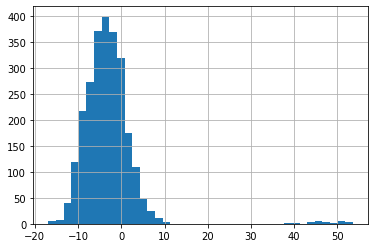

In [7]:
df['rama_prepro'].hist(bins=40)
print(df['rama_prepro'].mean(), df['rama_prepro'].std())

-131.9129554671968 2.7497148373891367


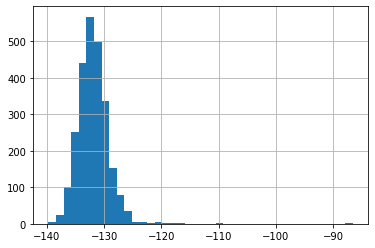

In [8]:
df['hbond_lr_bb'].hist(bins=40)
print(df['hbond_lr_bb'].mean(), df['hbond_lr_bb'].std())

-591.2883681908548 121.39098624691223


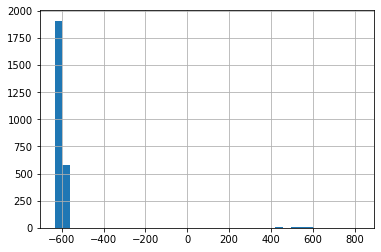

In [9]:
df['total_score'].hist(bins=40)
print(df['total_score'].mean(), df['total_score'].std())

In [18]:
best_round1 = df.loc[(df['total_score'] < -550) & (df['omega'] < 16.0) & (df['rama_prepro'] < -3) & (df['hbond_lr_bb'] < -128)]
#best_round1.shape
for model in best_round1.description:
    folder_id = "_".join(model.split("_")[0:3])
    source = "best500_AAG/" + str(folder_id) + "/" + model + ".pdb"
    target = "round1_AAG/" + model + ".pdb"
    copyfile(source, target)

In [2]:
df = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('best_200_AAAGG/*__input_*/score.sc')], ignore_index = True)
print df

     SCORE:  total_score  dslf_fa13   fa_atr   fa_dun  fa_elec  fa_intra_rep  \
0    SCORE:     -398.651        0.0 -597.811   97.587 -246.670         1.262   
1    SCORE:     -388.285        0.0 -592.514  104.944 -245.595         1.373   
2    SCORE:     -392.825        0.0 -582.011   94.813 -261.821         1.168   
3    SCORE:     -401.955        0.0 -582.534   91.896 -245.974         1.156   
4    SCORE:     -399.010        0.0 -599.945  103.746 -255.615         1.337   
5    SCORE:     -413.838        0.0 -600.581   94.060 -247.970         1.260   
6    SCORE:     -412.315        0.0 -607.139  104.933 -251.784         1.302   
7    SCORE:     -427.854        0.0 -615.161   99.664 -256.290         1.365   
8    SCORE:     -403.723        0.0 -598.187   97.434 -257.173         1.240   
9    SCORE:     -407.535        0.0 -605.922  102.364 -255.479         1.308   
10   SCORE:     -390.281        0.0 -590.385   89.749 -256.400         1.257   
11   SCORE:     -396.337        0.0 -567

(14.397738064516128, 4.34814222229521)


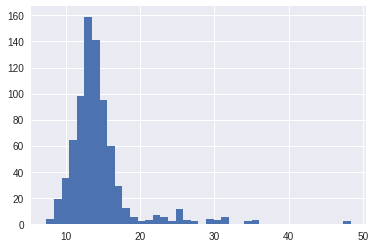

In [3]:
df['omega'].hist(bins=40)
print(df['omega'].mean(), df['omega'].std())

(-4.0910916129032255, 5.4469146066288125)


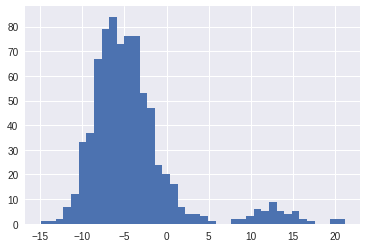

In [4]:
df['rama_prepro'].hist(bins=40)
print(df['rama_prepro'].mean(), df['rama_prepro'].std())

(-86.591006451612898, 2.6741875713242305)


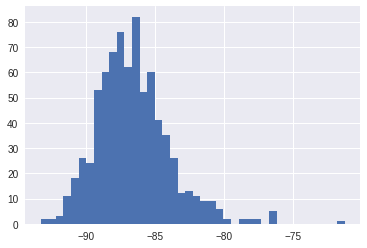

In [5]:
df['hbond_lr_bb'].hist(bins=40)
print(df['hbond_lr_bb'].mean(), df['hbond_lr_bb'].std())

(-335.55036903225806, 216.05220453853102)


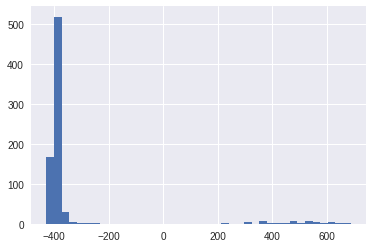

In [6]:
df['total_score'].hist(bins=40)
print(df['total_score'].mean(), df['total_score'].std())

In [11]:
best_round1 = df.loc[(df['total_score'] < -370) & (df['omega'] < 13.5) & (df['rama_prepro'] < -3.6) & (df['hbond_lr_bb'] < -85)]
best_round1.shape

for model in best_round1.description:
    model_id = model.split("_")[:-1]
    folder_id = "network_filter/" + "_".join(model.split("_")[0:4])
    source = "best_200_AAAGG/" + str(folder_id) + "/" + model + ".pdb"
    target = "round1_AAAGG/" + model + ".pdb"
    copyfile(source, target)